## Normalizacja

In [14]:
data = read.csv("day.csv")
head(data)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [19]:
summary(data)

    instant             dteday        season            yr        
 Min.   :  1.0   2011-01-01:  1   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   2011-01-02:  1   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   2011-01-03:  1   Median :3.000   Median :1.0000  
 Mean   :366.0   2011-01-04:  1   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   2011-01-05:  1   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   2011-01-06:  1   Max.   :4.000   Max.   :1.0000  
                 (Other)   :725                                   
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.0

In [45]:
keeps <- c("temp","atemp",  "hum", "windspeed", "registered", "casual", "cnt")
df = data[keeps]
head(df)

temp,atemp,hum,windspeed,registered,casual,cnt
0.344167,0.363625,0.805833,0.1604460,654,331,985
0.363478,0.353739,0.696087,0.2485390,670,131,801
0.196364,0.189405,0.437273,0.2483090,1229,120,1349
0.200000,0.212122,0.590435,0.1602960,1454,108,1562
0.226957,0.229270,0.436957,0.1869000,1518,82,1600
0.204348,0.233209,0.518261,0.0895652,1518,88,1606


In [46]:
x <- df
normalized = (x-min(x))/(max(x)-min(x))
normalized = data.frame(normalized, 'season' = data$season)
head(normalized)
range(normalized)

temp,atemp,hum,windspeed,registered,casual,cnt,season
3.949587e-05,4.172883e-05,9.247567e-05,1.841244e-05,0.07505164,0.037984852,0.11303649,1
4.171196e-05,4.059433e-05,7.988146e-05,2.852180e-05,0.07688777,0.015033280,0.09192105,1
2.253431e-05,2.173571e-05,5.018051e-05,2.849541e-05,0.14103741,0.013770943,0.15480835,1
2.295157e-05,2.434267e-05,6.775706e-05,1.839523e-05,0.16685793,0.012393849,0.17925178,1
2.604510e-05,2.631053e-05,5.014425e-05,2.144824e-05,0.17420243,0.009410145,0.18361258,1
2.345054e-05,2.676257e-05,5.947452e-05,1.027831e-05,0.17420243,0.010098692,0.18430112,1


[1] 0 4

In [47]:
write.csv(normalized, file = "day_normalized.csv")

In [48]:
cor(normalized)

,temp,atemp,hum,windspeed,registered,casual,cnt,season
temp,1.0000000,0.9917016,0.12696294,-0.1579441,0.5400120,0.54328466,0.6274940,0.3343149
atemp,0.9917016,1.0000000,0.13998806,-0.1836430,0.5441918,0.54386369,0.6310657,0.3428756
hum,0.1269629,0.1399881,1.00000000,-0.2484891,-0.0910886,-0.07700788,-0.1006586,0.2054448
windspeed,-0.1579441,-0.1836430,-0.24848910,1.0000000,-0.2174490,-0.16761335,-0.2345450,-0.2290463
registered,0.5400120,0.5441918,-0.09108860,-0.2174490,1.0000000,0.39528245,0.9455169,0.4116231
casual,0.5432847,0.5438637,-0.07700788,-0.1676133,0.3952825,1.00000000,0.6728044,0.2103992
cnt,0.6274940,0.6310657,-0.10065856,-0.2345450,0.9455169,0.67280443,1.0000000,0.4061004
season,0.3343149,0.3428756,0.20544476,-0.2290463,0.4116231,0.21039916,0.4061004,1.0000000


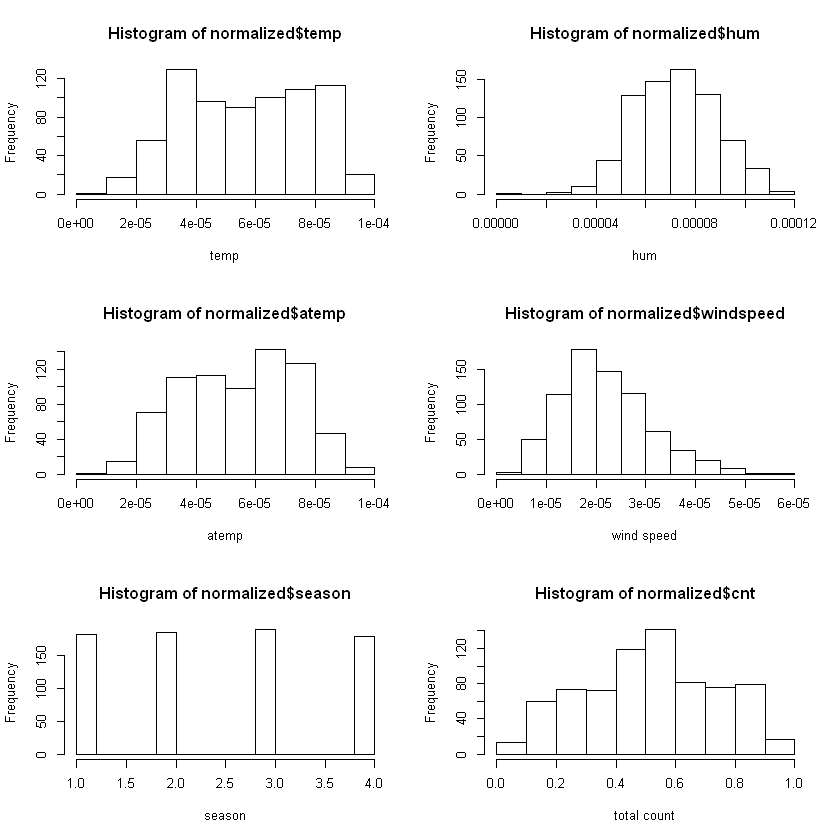

In [49]:
par(mfrow = c(3,2))

hist(normalized$temp, xlab = 'temp')
hist(normalized$hum, xlab = 'hum')
hist(normalized$atemp, xlab = 'atemp')
hist(normalized$windspeed, xlab = 'wind speed')
hist(normalized$season, xlab = 'season')
hist(normalized$cnt, xlab = 'total count')

## Dodaje kolumnę z procentowym udziałem zarejestrowanych userów w całości cnt wypozyczonych rowerow

In [67]:
data_p <- data.frame(normalized, 'registered' = (normalized$registered / normalized$cnt))
data_p$registered = data_p$registered.1
keeps <- c("temp","atemp",  "hum", "windspeed", "registered", "cnt", "season")
data_p = data_p[keeps]
head(data_p)

temp,atemp,hum,windspeed,registered,cnt,season
3.949587e-05,4.172883e-05,9.247567e-05,1.841244e-05,0.6639594,0.11303649,1
4.171196e-05,4.059433e-05,7.988146e-05,2.852180e-05,0.8364544,0.09192105,1
2.253431e-05,2.173571e-05,5.018051e-05,2.849541e-05,0.9110452,0.15480835,1
2.295157e-05,2.434267e-05,6.775706e-05,1.839523e-05,0.9308579,0.17925178,1
2.604510e-05,2.631053e-05,5.014425e-05,2.144824e-05,0.9487500,0.18361258,1
2.345054e-05,2.676257e-05,5.947452e-05,1.027831e-05,0.9452055,0.18430112,1


In [68]:
write.csv(data_p, file = "day_with_registered_percent")

## Wartości odstające

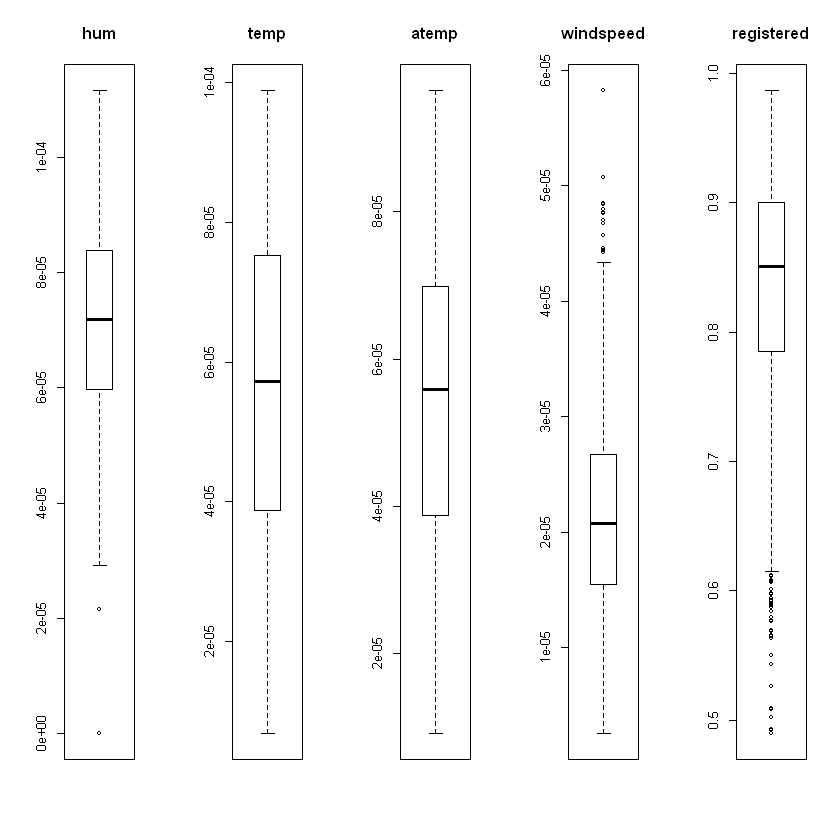

In [69]:
par(mfrow=c(1, 5))

boxplot(data_p$hum, main="hum")
boxplot(data_p$temp, main="temp")
boxplot(data_p$atemp, main="atemp")
boxplot(data_p$windspeed, main="windspeed")
boxplot(data_p$registered, main="registered")

In [70]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

withoutOutliers <- data.frame(
    'hum' = remove_outliers(data_p$hum),
    'temp' = remove_outliers(data_p$temp),
    'atemp' = remove_outliers(data_p$atemp),
    'windspeed' = remove_outliers(data_p$windspeed),
    'registered' = remove_outliers(data_p$registered),
    'season' = data_p$season,
    'cnt' = data_p$cnt)
head(withoutOutliers)

hum,temp,atemp,windspeed,registered,season,cnt
9.247567e-05,3.949587e-05,4.172883e-05,1.841244e-05,0.6639594,1,0.11303649
7.988146e-05,4.171196e-05,4.059433e-05,2.852180e-05,0.8364544,1,0.09192105
5.018051e-05,2.253431e-05,2.173571e-05,2.849541e-05,0.9110452,1,0.15480835
6.775706e-05,2.295157e-05,2.434267e-05,1.839523e-05,0.9308579,1,0.17925178
5.014425e-05,2.604510e-05,2.631053e-05,2.144824e-05,0.9487500,1,0.18361258
5.947452e-05,2.345054e-05,2.676257e-05,1.027831e-05,0.9452055,1,0.18430112


In [71]:
# Jak dobrze liczę strasznie dużo się usunęło... powinno być do 10%

removed_rate <- 100 * (1 - (length(withoutOutliers) / length(data)))

print(removed_rate)

[1] 56.25


In [72]:
summary(withoutOutliers)

      hum                 temp               atemp             windspeed      
 Min.   :0.0000292   Min.   :6.786e-06   Min.   :9.074e-06   Min.   :3.0e-06  
 1st Qu.:0.0000599   1st Qu.:3.868e-05   1st Qu.:3.877e-05   1st Qu.:1.5e-05  
 Median :0.0000720   Median :5.719e-05   Median :5.586e-05   Median :2.1e-05  
 Mean   :0.0000722   Mean   :5.685e-05   Mean   :5.444e-05   Mean   :2.1e-05  
 3rd Qu.:0.0000838   3rd Qu.:7.521e-05   3rd Qu.:6.984e-05   3rd Qu.:2.6e-05  
 Max.   :0.0001116   Max.   :9.888e-05   Max.   :9.650e-05   Max.   :4.3e-05  
 NA's   :2                                                   NA's   :13       
   registered         season           cnt          
 Min.   :0.6153   Min.   :1.000   Min.   :0.002525  
 1st Qu.:0.8047   1st Qu.:2.000   1st Qu.:0.361717  
 Median :0.8533   Median :3.000   Median :0.521919  
 Mean   :0.8376   Mean   :2.497   Mean   :0.516909  
 3rd Qu.:0.9040   3rd Qu.:3.000   3rd Qu.:0.683498  
 Max.   :0.9868   Max.   :4.000   Max.   :1.000000

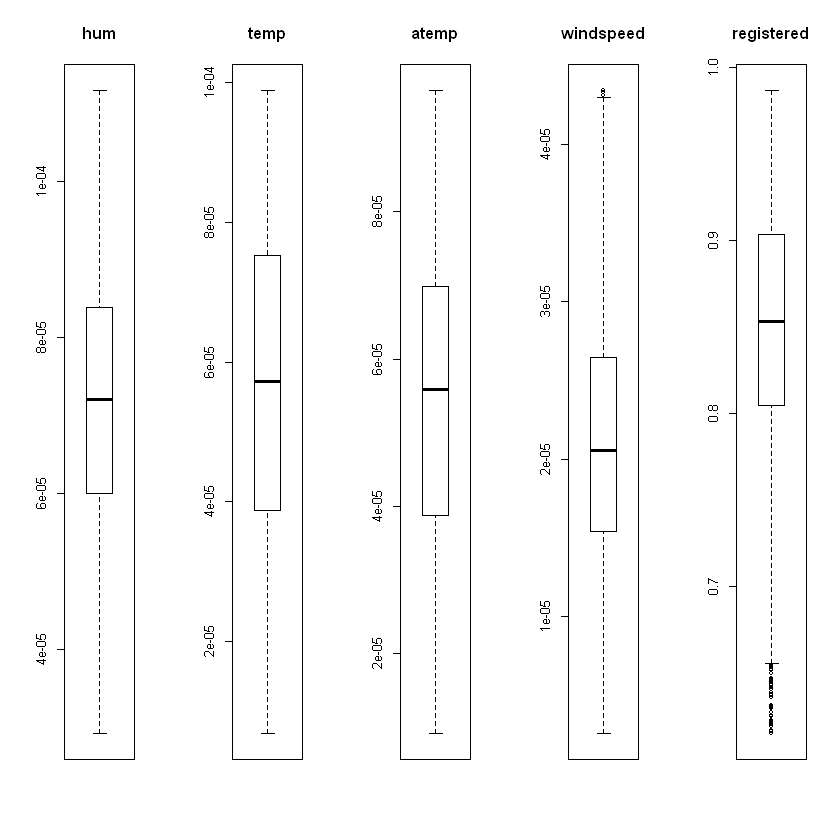

In [73]:
par(mfrow=c(1, 5))

boxplot(withoutOutliers$hum, main="hum")
boxplot(withoutOutliers$temp, main="temp")
boxplot(withoutOutliers$atemp, main="atemp")
boxplot(withoutOutliers$windspeed, main="windspeed")
boxplot(withoutOutliers$registered, main="registered")

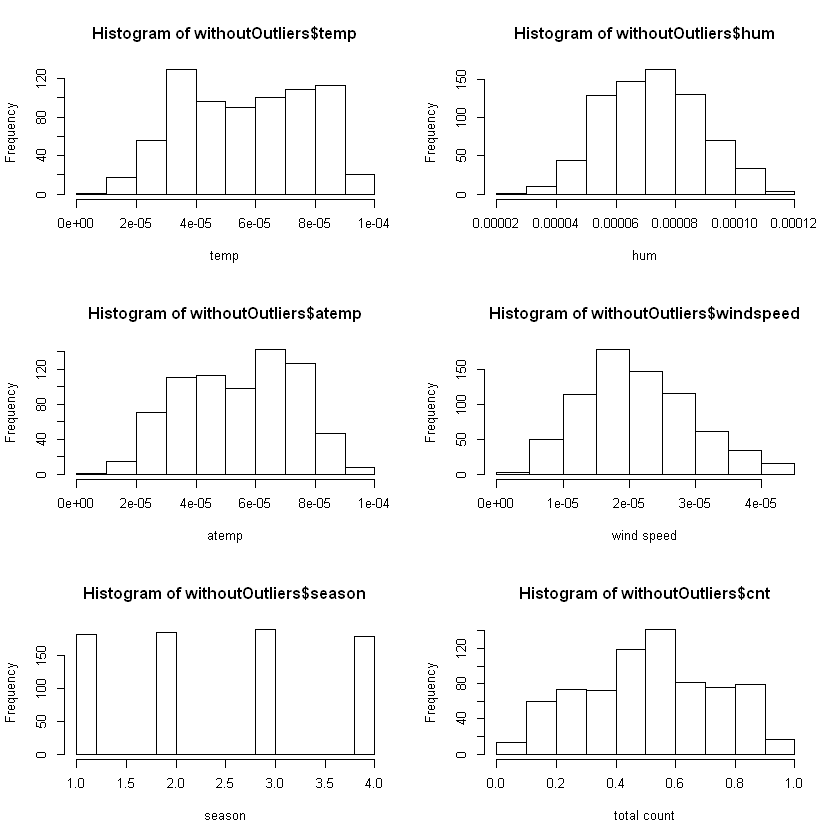

In [74]:
par(mfrow = c(3,2))

hist(withoutOutliers$temp, xlab = 'temp')
hist(withoutOutliers$hum, xlab = 'hum')
hist(withoutOutliers$atemp, xlab = 'atemp')
hist(withoutOutliers$windspeed, xlab = 'wind speed')
hist(withoutOutliers$season, xlab = 'season')
hist(withoutOutliers$cnt, xlab = 'total count')

Metoda forward


Call:
lm(formula = withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50477 -0.12336 -0.00733  0.12536  0.39537 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.500e-01  8.040e-02   6.841 1.76e-11 ***
withoutOutliers$temp        1.917e+03  2.316e+03   0.828   0.4080    
withoutOutliers$atemp       5.073e+03  2.620e+03   1.937   0.0532 .  
withoutOutliers$hum        -3.432e+03  4.057e+02  -8.458  < 2e-16 ***
withoutOutliers$windspeed  -4.493e+03  7.981e+02  -5.630 2.64e-08 ***
withoutOutliers$registered -8.409e-02  7.573e-02  -1.110   0.2672    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1629 on 675 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.4673,	Adjusted R-square

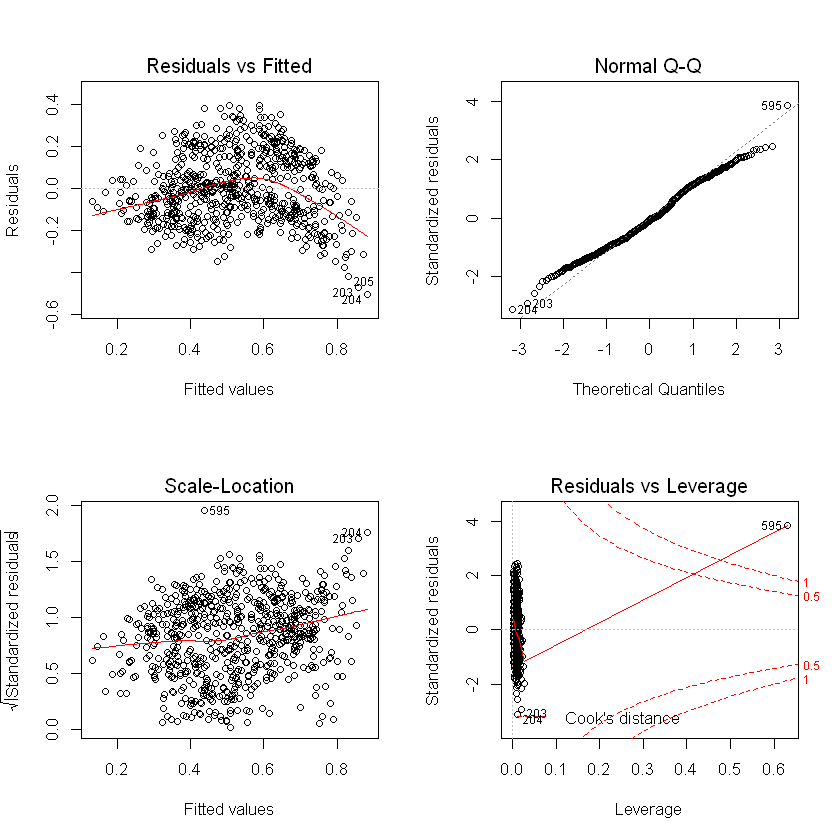

In [82]:
model <- lm(withoutOutliers$cnt~withoutOutliers$temp + withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered)
summary(model)
par(mfrow=c(2, 2))
plot(model)

In [83]:
model.forward <- step(model, direction="forward", trace=1, scope= ~withoutOutliers$temp + withoutOutliers$atemp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered)

Start:  AIC=-2465.13
withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$atemp + 
    withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$registered



In [81]:
write.csv(withoutOutliers, file = "day_final")